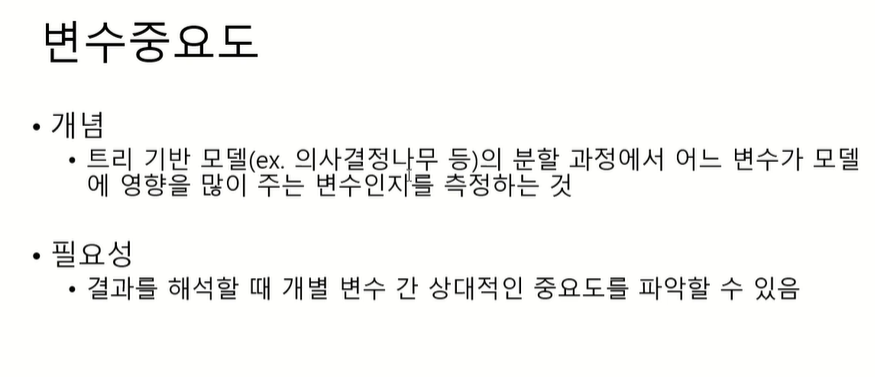

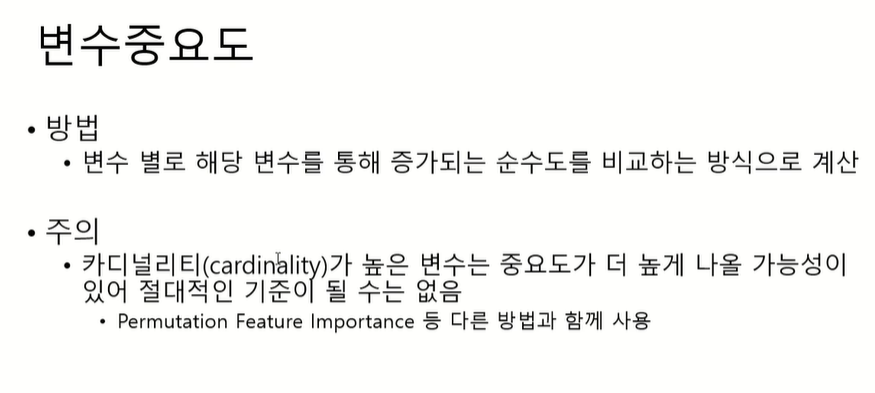

# 변수중요도

In [2]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier

#타이타닉 데이터 로드
df= pd.read_csv('./data/titanic.csv', index_col=['PassengerId'])

#변수 제거
df = df.drop({'Name','Ticket','Cabin','Embarked'}, axis = 1)

#결측치 처리
df.Age.fillna(df.Age.median(), inplace = True)

#진위형 변수로 변경
df['Sex'] = df.Sex.map({'female': 0, 'male':1})

#imput 변수와 output 변수 구분
X = np.array(df.iloc[:,1:])
y = np.array(df['Survived'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [3]:
pd.DataFrame(tree.feature_importances_.reshape((1,-1)), index = ['feature_importance'])

,0,1,2,3,4,5
feature_importance,0.175689,0.615522,0.067943,0.087671,0.0,0.053175


In [4]:
pd.DataFrame(tree.feature_importances_.reshape((1,-1)), columns=df.columns[1:], index = ['feature_importance'])

,Pclass,Sex,Age,SibSp,Parch,Fare
feature_importance,0.175689,0.615522,0.067943,0.087671,0.0,0.053175


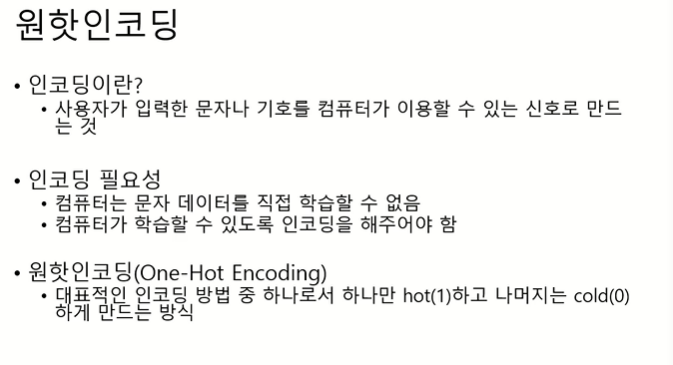

# 원핫인코딩

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [6]:
#타이타닉 데이터에서 탑승항구 변수를 인코딩
df = pd.read_csv('./data/titanic.csv', index_col=['PassengerId'])
print(df.shape)
df.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df = df.drop({'Name','Ticket','Cabin'}, axis = 1)

In [8]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [9]:
# Age의 결측치는 중간값으로 embarked의 결측치는 제거
df.Age.fillna(df.Age.median(), inplace = True)
df = df.dropna()

In [10]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,28.0,1,2,23.4500,S


In [11]:
#결측치 제거 이후 index를 재조정 - Passenger Id 제거
df = df.reset_index(drop = True)

In [12]:
# 원한인코더를 encoder라는 변수에 저장
encoder = OneHotEncoder()

In [14]:
#encoder를 사용해 Embarked 항목 값으로 학습
encoder.fit(df[['Embarked']])

OneHotEncoder()

In [17]:
#encoder의 transform을 사용해 embarked 변수를 변환해 onehot이라는 변수에 저장
onehot = encoder.transform(df[['Embarked']])

In [18]:
# onehot이라는 변수를 array 형태로 ㅂ변환
onehot = onehot.toarray()

In [19]:
# onehot이라는 변수를 DataFrame 형태로 변환
onehot = pd.DataFrame(onehot)

In [20]:
# 참고) encoder의 'get_feature_names()'를 사용하면 column 이름을 자동생성할 수 있음
encoder.get_feature_names()

C:\Users\alsgu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_C', 'x0_Q', 'x0_S'], dtype=object)

In [21]:
# 칼럼 이름 직점생성
onehot.columns = ['C','Q','S']

In [22]:
# 결과확인
onehot

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
884,0.0,0.0,1.0
885,0.0,0.0,1.0
886,0.0,0.0,1.0
887,1.0,0.0,0.0


In [23]:
# 기존 df에 인코딩 결과를 병합
onehot = pd.concat([df, onehot], axis = 1)

In [24]:
onehot

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,male,22.0,1,0,7.2500,S,0.0,0.0,1.0
1,1,1,female,38.0,1,0,71.2833,C,1.0,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,0.0,0.0,1.0
3,1,1,female,35.0,1,0,53.1000,S,0.0,0.0,1.0
4,0,3,male,35.0,0,0,8.0500,S,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,male,27.0,0,0,13.0000,S,0.0,0.0,1.0
885,1,1,female,19.0,0,0,30.0000,S,0.0,0.0,1.0
886,0,3,female,28.0,1,2,23.4500,S,0.0,0.0,1.0
887,1,1,male,26.0,0,0,30.0000,C,1.0,0.0,0.0


In [25]:
# 인코딩 전 'embarked'변수 제거 후 df에 업데이트
df = onehot.drop('Embarked', axis =1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,male,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,1,female,38.0,1,0,71.2833,1.0,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,female,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,male,35.0,0,0,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
884,0,2,male,27.0,0,0,13.0000,0.0,0.0,1.0
885,1,1,female,19.0,0,0,30.0000,0.0,0.0,1.0
886,0,3,female,28.0,1,2,23.4500,0.0,0.0,1.0
887,1,1,male,26.0,0,0,30.0000,1.0,0.0,0.0
